<a href="https://colab.research.google.com/github/cic4k/IVADO_DL/blob/master/tutorial1_data_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IVADO/Mila Deep Learning School
# 4th edition (fall 2019)
# Tutorial: Data

## Authors: 

Arsène Fansi Tchango <arsene.fansi.tchango@mila.quebec>

Francis Grégoire <francis.gregoire@mila.quebec>

# Preface

The purpose of this tutorial is to emphasize the importance to understand the data on which a machine learning (ML) project is defined. This understanding will help you consider valuable operations to do before training your machine learning models. It serves as a gentle introduction to data exploration and covers basic things that every machine learning practitioner should know.

**Note: the purpose of this tutorial is to be introductory. Thus, we propose simple solutions to our exercises. In practice, you should use more advanced techniques to train your models.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Introduction

In this tutorial, we will use the [CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10) dataset. It is a collection of 32 x 32 color images in 10 different classes. The 10 different (indexed-)classes are the following:
0. airplane;
1. automobile;
2. bird;
3. cat;
4. deer;
5. dog;
6. frog;
7. horse;
8. ship;
9. truck.

The task of interest in this tutorial is an image classification task. That is, we are interested in finding, for a given image, the class it belongs to. We will use [PyTorch](https://pytorch.org/) as the machine learning framework.

At this stage, all functions and related PyTorch methods will be provided and used as is. This is because this tutorial is not meant to learn PyTorch, but rather to focus on understanding data and basic machine learning concepts. In the following tutorials, you will learn how to develop, train and evaluate models on different kinds of data.

# Data download

In this section, we provide a function for downloading the CIFAR-10 dataset. It takes as input two arguments:
- **path**: directory where the dowloaded dataset will be saved.
- **train_flag**: boolean flag indicating whether to download data from the training set (`train_flag=True`) or the test set (`train_flag=False`).

It returns two elements, namely:
- **imgs**: numpy array representing the downloaded images of size N x 32 x 32 x 3 where N is the number of images.
- **labels**: list of N (indexed-)classes, each one associated with a single image.

In [0]:
import torch
import torchvision


def download_CIFAR10(path, train_flag):
  """
  Args:
     path: directory where the dowloaded dataset will be saved.
     train_flag: if `True`, download data from training set, otherwise
        download from test set.
        
  Return:
     A tuple of two elements (imgs, labels) where
        imgs: a numpy array of shape N x 32 x 32 x 3 where N is the number of images.
        labels: list of N (indexed-)classes, each one associated with a single image.
  
  """
  dataset = torchvision.datasets.CIFAR10(
      root=path, train=train_flag, download=True
  )
  imgs, labels = dataset.data, dataset.targets
  return imgs, labels


## Exercise

Download the CIFAR-10 train dataset.

In [4]:
imgs, labels = download_CIFAR10("/content/drive/My Drive/IVADO_DL/",
                                train_flag=True)


Extracting /content/drive/My Drive/IVADO_DL/cifar-10-python.tar.gz to /content/drive/My Drive/IVADO_DL/


## Exercise

Download the CIFAR-10 test dataset.

In [7]:
test_imgs, test_labels = download_CIFAR10("/content/drive/My Drive/IVADO_DL/",
                                train_flag=False)

Files already downloaded and verified
10000


In [13]:
print("Number of training samples: {}".format(len(imgs)))
print("Number of test samples: {}".format(len(test_imgs)))

Number of training samples: 50000
Number of test samples: 10000


# Validation dataset

In the previous section, functions were provided to download the **train** and **test** datasets. As you may have learned in this school, we normally need three sets of data in a machine learning project, namely train, **validation**, and test sets. Unfortunately, the CIFAR-10 dataset does not contain a native preprocessed validation dataset, therefore we need to create a **custom** one by sampling from the **training** dataset.

In this section, we provide a function for creating a validation dataset from the original training dataset. It takes as input five arguments:
- **imgs**: numpy array representing the image set from which the partitioning is made.
- **labels**: labels associated with the provided image set.
- **valid_ratio** (optional): portion of the data that will be used for  the validation set. Default: `0.1`.
- **shuffle** (optional): whether or not the data need to be shuffled before the partitioning is made. Default: `True`.
- **seed** (optional): seed of the random generator. Default: `1234`.

It provides as output 4 elements, which are:
- **train_imgs**: numpy array representing the images of the training set after the splitting is done.
- **train_labels**: labels associated with the images of the training set.
- **valid_imgs**: numpy array representing the images of the validation set after the splitting is done.
- **valid_labels**: labels associated with the images of the validation set.

In [0]:
import numpy as np


def partition_dataset(imgs, labels, valid_ratio=0.1, shuffle=True, seed=1234):
  """
  Args:
     imgs: numpy array representing the image set from which 
        the partitioning is made.
     labels: the labels associated with the provided images.
     valid_ratio (optional): the portion of the data that will be used in
        the validation set. Default: 0.1.
     shuffle (optional): whether or not to shuffle the data. Default: True.
     seed (optional): the seed of the numpy random generator: Default: 1234.
        
  Return:
     A tuple of 4 elements (train_imgs, train_labels, valid_imgs, valid_labels)
     where:
        train_imgs: a numpy array of images for the training set.
        train_labels: labels associated with the images in the training set.
        valid_imgs: a numpy array of images for the validation set.
        valid_labels: labels associated with the images in the validation set.
  
  """
  if shuffle:
    np.random.seed(seed)  # Set the random seed of numpy.
    indices = np.random.permutation(imgs.shape[0])
  else:
    indices = np.arange(imgs.shape[0])
  
  train_idx, valid_idx = np.split(
      indices, 
      [int((1.0 - valid_ratio)*len(indices))]
  )
  train_imgs, valid_imgs = imgs[train_idx], imgs[valid_idx]
  tgt = np.array(labels)
  train_labels, valid_labels = tgt[train_idx].tolist(), tgt[valid_idx].tolist()
  return train_imgs, train_labels, valid_imgs, valid_labels
  

## Exercise

Using the default parameters, generate the custom training and validation datasets.

In [0]:
train_imgs, train_labels, valid_imgs, valid_labels = partition_dataset(imgs,
                                                      labels,
                                                      shuffle=False)


In [19]:
print("Number of training samples: {}".format(len(train_imgs)))
print("Number of validation samples: {}".format(len(valid_imgs)))
print("Number of test samples: {}".format(len(test_imgs)))

Number of training samples: 45000
Number of validation samples: 5000
Number of test samples: 10000


# Data visualization

It is always a good practice to visualize the data we are working with. In particular, visualizing the data distribution will provide valuable insights on the data at hand. 

In this section, we provide some functions for visualizing image data and computing the label distribution within a dataset.

In [0]:
import matplotlib.pyplot as plt


def plot_image(image):
  """
  Plot a single image.
  
  Args:
     image: image to be plotted.
     
  """
  plt.imshow(image)
  plt.show()

  
def plot_random_images_from_dataset(images, n):  
  """
  Randomly sample n images from an image set and plot them in a grid.
  
  Args:
     images: collection of images from which sampling will be made.
     n: the number of images to be sampled.
     
  """
  sampled_indices = np.random.choice(images.shape[0], n, False)
  sampled_images = images[sampled_indices]
  
  sampled_images = np.transpose(sampled_images, (0, 3, 1, 2))
  sampled_tensor = torch.Tensor(sampled_images)
  
  grid_tensor = torchvision.utils.make_grid(
      sampled_tensor, normalize=True, range=(0, 255)
  )
  grid_tensor = np.transpose(grid_tensor.numpy(), (1, 2, 0))
  
  plot_image(grid_tensor)
  
  
def plot_dataset_histogram(labels, title='Label distribution'):
  """
  Plot the histogram/distribution of the labels within a dataset.
  
  Args:
     labels: collection of labels from which the distribution is computed.
     
  """
  _ = plt.hist(labels, bins=np.arange(11)-0.5, rwidth=0.85)
  plt.title(title)
  plt.xlabel('Label')
  plt.ylabel('Frequency')
  plt.xticks(np.arange(10))
  plt.show()


## Exercise

Use the previous defined functions to visualize samples from training and validation datasets. Also, compute the label distributions within these two datasets. What conclusions could you make?

Index: 14262


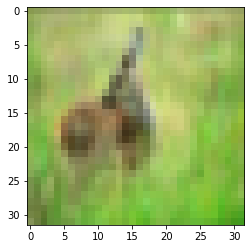

Label 4


In [27]:
# plot a given sample from the training dataset and retrieve its label

r_sample_index = sampled_indices = np.random.choice(train_imgs.shape[0], 1, False)[0]
print("Index:", r_sample_index)
r_image, r_label = train_imgs[r_sample_index], train_labels[r_sample_index]

plot_image(r_image)
print("Label", r_label)


... # To complete.


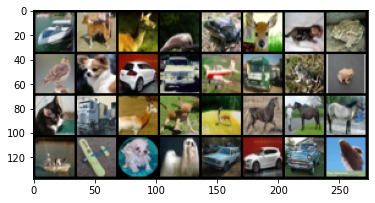

In [34]:
# plot random samples (e.g., 16) from the training dataset
plot_random_images_from_dataset(train_imgs, 32)


... # To complete.


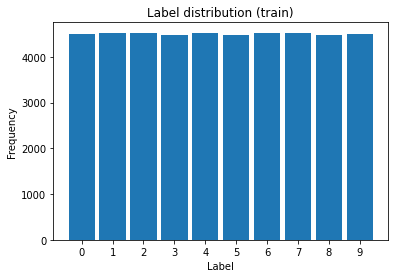

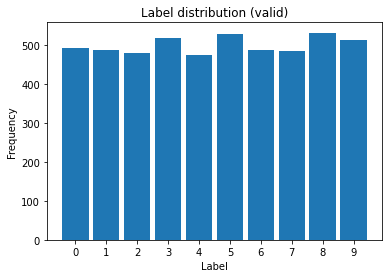

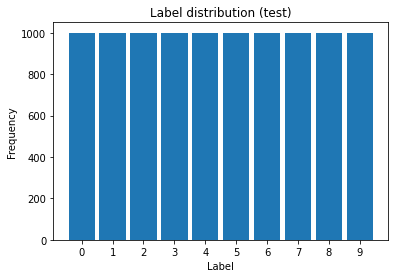

In [38]:
# plot the label distribution of the training dataset
plot_dataset_histogram(train_labels, title='Label distribution (train)')
plot_dataset_histogram(valid_labels, title='Label distribution (valid)')
plot_dataset_histogram(test_labels, title='Label distribution (test)')


... # To complete.


# Shuffling data

When creating your own training/validation/test sets, it is crucial to **shuffle** the original dataset to partition the data across the training/validation/test sets to make sure that they are more representative of the **overall data distribution**. Shuffling your dataset will also reduce biases if your data comes from different data sources.

The CIFAR-10 datasets downloaded at the beginning of this tutorial were already shuffled. To visualize the effectiveness of shuffling, suppose you receive a dataset and after the split you observe the following label distributions.

What will be the consequences of using this split on your performance metrics?

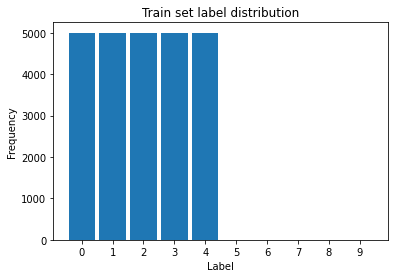

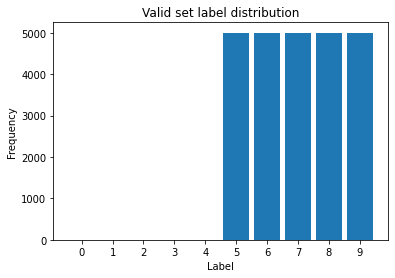

In [39]:
sorted_idx = np.argsort(labels)
sorted_imgs = imgs[sorted_idx]
sorted_labels = [labels[i] for i in sorted_idx]

_, sorted_train_labels, _, sorted_valid_labels = partition_dataset(sorted_imgs, sorted_labels,
                                                                   valid_ratio=0.5, shuffle=False)
plot_dataset_histogram(sorted_train_labels, 'Train set label distribution')
plot_dataset_histogram(sorted_valid_labels, 'Valid set label distribution')

... # To complete.


Below, we shuffle the data and observe that the labels are evenly distributed in the training/validation sets, which is a required property to perform accurate fine-tuning on a validation set.

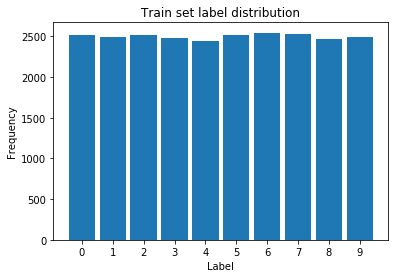

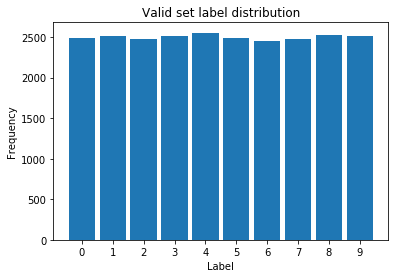

In [0]:
_, shuffled_train_labels, _, shuffled_valid_labels = partition_dataset(
    sorted_imgs, sorted_labels, valid_ratio=0.5, shuffle=True
)

plot_dataset_histogram(shuffled_train_labels, 'Train set label distribution')
plot_dataset_histogram(shuffled_valid_labels, 'Valid set label distribution')

# Dataloaders

As you will see in the next tutorials, to train and evaluate machine learning models, we use **dataloaders**. Since machine learning requires heavy usage of data transformation, we want tools that efficiently **transform**, **shuffle** and **batch** our datasets with the option to use multiprocessing workers. A dataloader is an optimized data iterator which provides all these features.

Few years ago, to train a deep learning model on a given task we needed to code our own dataloader. Fortunately, modern deep learning frameworks, such as PyTorch and TensorFlow, introduced very efficient dataloaders in their latest releases.

## Exercise
We show a simple example on how to prepare a dataloader using a small subset of our training set. During training, it is best practice to shuffle the data at the beginning of each **epoch** (each repetition over an entire dataset is typically referred to as an epoch). Thus, we normally set `shuffle=True` for training and `shuffle=False` for evaluation.

In [42]:
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader


def create_dataset(images, labels, n):
  """
  Slice the first n images/labels and create a torch.utils.data.DataLoader.
  
  Args:
     images: numpy array of images.
     labels: list of labels associated with the images.
     n: the number of images/labels to slice.
        
  Return:
     A torch.utils.data.TensorDataset to be used with a torch.utils.data.DataLoader.
     
  """
  imgs = torch.tensor(images[:n], dtype=torch.float)
  labels = torch.tensor(labels[:n], dtype=torch.long)
  dataset = TensorDataset(imgs, labels)
  return dataset


n = 100
batch_size = 32
train_dataset = create_dataset(train_imgs, train_labels, n)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,
                              drop_last=False, shuffle=True)

epochs = 2
for epoch in range(epochs):
  print('Epoch {}/{}:'.format(epoch+1, epochs))
  for i, (x, y) in enumerate(train_dataloader):
    print('   batch {}/{} of {} examples.'.format(
        i+1, int(np.ceil(n/batch_size)
        ), y.size(0)))

Epoch 1/2:
   batch 1/4 of 32 examples.
   batch 2/4 of 32 examples.
   batch 3/4 of 32 examples.
   batch 4/4 of 4 examples.
Epoch 2/2:
   batch 1/4 of 32 examples.
   batch 2/4 of 32 examples.
   batch 3/4 of 32 examples.
   batch 4/4 of 4 examples.


We see that we can easily iterate over the created dataset for a number of epochs with a simple `for` loop. At every iteration, the dataloader returns a mini-batch of `batch_size` input-label pairs `(x, y)`.

By setting `drop_last=False`, the last incomplete batch is kept if the dataset size is not divisible by `batch_size`. When training a model, to calculate the loss we normally average the loss of the examples of a mini-batch. Thus, by having a mini-batch of 4 examples instead of 32, the examples of the last mini-batch have more importance than the other examples of the dataset. In practice, this is not detrimental as the examples are shuffled at the beginning of an epoch. Therefore, at each epoch we should have different examples in the last mini-batch. More details on this topic will be provided in the coming days.


# Training with neural networks

In this section, we provide neural network based methods that will be used subsequently as black boxes for training and evaluation purposes. Don't worry, in the next tutorials, you will learn how to write such pieces of code.

There are two methods that will be intensively used in subsequent sections. 

The first one is `training_on_dataset` which trains a model on a given dataset. It takes as input the following arguments and returns a **trained model**:
- **imgs**: images the model will be trained on.
- **labels**: labels associated with the provided images.
- **eval_imgs**: images to evaluate the model.
- **eval_labels**: labels associated to the images used to evaluate the model.
- **epochs**: number of epochs during the training (number of times to loop over the whole set of images/labels).
- **batch_size** (optional): size of a mini-batch. Default: `8`.
- **lr** (optional): learning rate. Default: `1e-3`.
- **seed** (optional): seed of the random generator. Default: `1234`.
- **transformations** (optional): transformations to apply on the images during the training process. Default: `None`.
- **label_weights** (optional): importance weights associated with each label. Default: `None` (all labels are treated equally).
- **metrics** (optional): metrics to monitor during training. Default: `None`.


The second one is `evaluate_classes`, which evaluates a trained model on a given dataset. It takes as input the following arguments and returns the **evaluation performance**:
- **net**: the trained model to be evaluated.
- **imgs**: images the model will be evaluated on.
- **labels**: ground truth labels associated with the provided images for performance computation.
- **batch_size** (optional): size of a mini-batch. Default: `8`.
- **metrics** (optional): performance metrics to compute. Default: `None`.



In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sklearn.metrics as metrics


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
classe_names = (
    'plane', 'car', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
)


def accuracy(y_true, y_pred):
  """
  Compute the accuracy score.
  
  Args:
     y_true: ground truth labels.
     y_pred: predicted labels by a classifier.
     
  Return:
     Accuracy score.
     
  """
  return metrics.accuracy_score(y_true, y_pred)


def f1_score(y_true, y_pred):
  """
  Compute the F1 score.
  
  Args:
     y_true: ground truth labels.
     y_pred: predicted labels by a classifier.
     
  Return:
     F1 score.
     
  """
  return metrics.f1_score(y_true, y_pred, average='macro')


def plot_metric(train_values, valid_values, name=''):
  """
  Plot the values of a given metric on training and validation sets.
  
  Args:
     train_values: values of the metric on the training set. 
     valid_values: values of the metric on the validation set.
     name: name of the metric.
  """
  x = range(len(train_values))
  plt.plot(x, train_values, label='train')
  plt.plot(x, valid_values, label='valid')
  plt.title(name)
  plt.legend()
  plt.show()
  

class AugmentBasedDataset(Dataset):
  """Encapsulated dataset for data augmentation."""

  def __init__(self, dataset, transform=None):
    """
    Args:
        dataset: dataset on which to perform data augmentation.
        transform (callable, optional): optional transform to be applied
            on a sample.

    """
    self.dataset = dataset
    self.transform = transform

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    img, label = self.dataset[idx]
    if self.transform:
        img = self.transform(img)
    return img, label


In [0]:
class Net(nn.Module):
  """Basic CNN used for image classification."""
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [0]:
def training_on_dataset(imgs, labels, eval_imgs, eval_labels,
                        epochs, batch_size=8, lr=1e-3,
                        seed=1234, transformations=None, label_weights=None,
                        metrics=None, verbose=True):
  """Black box function to train a neural network on CIFAR-10 dataset."""
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  np.random.seed(seed)
  
  # Train data.
  train_imgs = ((imgs/255.0) - 0.5) * 2.0  # Normalize to [-1, 1].
  train_imgs = np.transpose(train_imgs, (0, 3, 1, 2))
  train_labels = np.array(labels)
  
  train_dataset = TensorDataset(
      torch.from_numpy(train_imgs).float(), 
      torch.from_numpy(train_labels).long()
  )
  train_dataset = AugmentBasedDataset(train_dataset, transformations)
  train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

  # Eval data.
  eval_imgs = ((eval_imgs/255.0) - 0.5) * 2.0 # Normalize to [-1, 1]
  eval_imgs = np.transpose(eval_imgs, (0, 3, 1, 2))
  eval_labels = np.array(eval_labels)
  
  eval_dataset = TensorDataset(
      torch.from_numpy(eval_imgs).float(), 
      torch.from_numpy(eval_labels).long()
  )
  eval_dataloader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)

  net = Net()
  net = net.to(device)
  if label_weights is not None:
    label_weights = torch.tensor(label_weights).float()
    label_weights = label_weights.to(device)
  criterion = nn.CrossEntropyLoss(weight=label_weights)
  optimizer = optim.Adam(net.parameters(), lr=lr)
  
  train_loss_values = []
  eval_loss_values = []
  train_metric_values = None
  eval_metric_values = None
  
  if metrics is not None:
    if isinstance(metrics, dict):
      train_metric_values = {metric: [] for metric in metrics.keys()}
      eval_metric_values = {metric: [] for metric in metrics.keys()}
    elif isinstance(metrics, (list, tuple)):
      train_metric_values = {metric: [] for metric in range(len(metrics))}
      eval_metric_values = {metric: [] for metric in range(len(metrics))}
    else:
      metrics = [metrics]
      train_metric_values = {metric: [] for metric in range(len(metrics))}
      eval_metric_values = {metric: [] for metric in range(len(metrics))}

  for epoch in range(epochs):  # Loop over the dataset.
    net.train()
    running_loss = 0.0
    n_update = 0
    y_true = []
    y_pred = []
    for data in train_dataloader:
      # data is a tuple of (inputs, targets).
      inputs, targets = data
      
      if targets.numel() > 1:
        y_true.extend(targets.flatten().tolist())
      else:
        y_true.append(targets.flatten().tolist())
      
      inputs = inputs.to(device)
      targets = targets.to(device)       

      # Reset the parameter gradients.
      optimizer.zero_grad()

      # Forward + backward + optimize.
      outputs = net(inputs)
      loss = criterion(outputs, targets)
      loss.backward()
      optimizer.step()
      
      # Predict label.
      _, predicted = torch.max(outputs, 1)
      if predicted.numel() > 1:
        y_pred.extend(predicted.flatten().tolist())
      else:
        y_pred.append(predicted.flatten().tolist())

      running_loss += loss.item()
      n_update += 1

    # Save and print statistics at the end of each training epoch.
    train_loss = running_loss / n_update
    train_loss_values.append(train_loss)
    eval_loss, eval_true, eval_pred = evaluate_during_training(net, criterion, eval_dataloader)
    eval_loss_values.append(eval_loss)
    
    if metrics is not None:
      for metric in metrics.keys():
        train_metric_values[metric].append(metrics[metric](y_true, y_pred))
        eval_metric_values[metric].append(metrics[metric](eval_true, eval_pred))
  
    if verbose:
      print('[Epoch {}/{}] Training loss: {:.3f} | Validation loss: {:.3f}' 
            .format(epoch + 1, epochs, train_loss, eval_loss)
      )
    running_loss = 0.0
    n_update = 0
    y_true = []
    y_pred = []
  
  if verbose:
    plot_metric(train_loss_values, eval_loss_values, 'Loss')
    if metrics is not None:
      for metric in metrics.keys():
        plot_metric(train_metric_values[metric], eval_metric_values[metric], metric)
  
  return net


def evaluate_during_training(net, criterion, dataloader):
  net.eval()
  running_loss = 0.0
  n_update = 0
  y_true = []
  y_pred = []
  for data in dataloader:
    inputs, targets = data
    if targets.numel() > 1:
      y_true.extend(targets.flatten().tolist())
    else:
      y_true.append(targets.flatten().tolist())
    inputs = inputs.to(device)
    targets = targets.to(device) 
    with torch.no_grad():
      outputs = net(inputs)
      loss = criterion(outputs, targets)  
      _, predicted = torch.max(outputs, 1)
      if predicted.numel() > 1:
        y_pred.extend(predicted.flatten().tolist())
      else:
        y_pred.append(predicted.flatten().tolist())
      running_loss += loss.item()
      n_update += 1
  eval_loss = running_loss / n_update
  return eval_loss, y_true, y_pred


def evaluate_classes(net, imgs, labels, batch_size=8, metrics=None, verbose=True):
  """Black box function to evaluate a neural network on CIFAR-10 dataset."""
  normalized_imgs = ((imgs/255.0) - 0.5) * 2.0 # Normalize to [-1, 1]
  normalized_imgs = np.transpose(normalized_imgs, (0, 3, 1, 2))
  arr_labels = np.array(labels)
  
  dataset = TensorDataset(
      torch.from_numpy(normalized_imgs).float(), 
      torch.from_numpy(arr_labels).long()
  )
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
  
  net = net.to(device)
  correct = 0
  total = 0
  class_correct = [0.0] * 10
  class_total = [0.0] * 10
  class_acc = [0.0] * 10
  
  metric_values = None
  if not (metrics is None):
    if isinstance(metrics, dict):
      metric_values = {a: 0.0 for a in metrics.keys()}
    elif isinstance(metrics, (list, tuple)):
      metric_values = {a: 0.0 for a in range(len(metrics))}
    else:
      metrics = [metrics]
      metric_values = {a: 0.0 for a in range(len(metrics))}
  
  with torch.no_grad():
    y_true = []
    y_pred = []
    for data in dataloader:
      inputs, targets = data
      
      if targets.numel() > 1:
        y_true.extend(targets.flatten().tolist())
      else:
        y_true.append(targets.flatten().tolist())
        
      inputs = inputs.to(device)
      targets = targets.to(device)
      outputs = net(inputs)
      _, predicted = torch.max(outputs, 1)
      
      if predicted.numel()>1:
        y_pred.extend(predicted.flatten().tolist())
      else:
        y_pred.append(predicted.flatten().tolist())
      
      total += targets.size(0)
      correct += (predicted == targets).sum().item()
      
      c = (predicted == targets).squeeze()
      for i in range(targets.size(0)):
        label = targets[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1
            
    if not (metric_values is None):
      for a in metric_values.keys():
        metric_values[a] = metrics[a](y_true, y_pred)
            
  global_acc = correct / max(total, 1.0)
  
  if verbose:
    if metrics is not None:
      print('Evaluation on the validation dataset:')
      for a in metric_values.keys():
        print('Metric {}: {:.0%}'.format(a, metric_values[a]))

  for i in range(10):
    class_acc[i] = class_correct[i] / max(class_total[i], 1.0)
    if verbose:
      print('Accuracy of {:<5s} ({}): {:.0%}'
            .format(classe_names[i], i, class_acc[i])
           )
    
  return global_acc, class_acc


# How much training data is needed?



In this section, we study the effect of the size of the training data on the final performance of the considered task. We also explore a technique, called **data augmentation**, to artificially augment the size of a given dataset during the training process.

Note that we keep the validation dataset fixed throughout this tutorial. This is just for the purpose of this tutorial, as we want the different evaluations to be comparable. In real-life scenarios, the validation dataset should never be bigger than the training dataset.

## Training with only 1% of the data

Let's start by considering only 1% of our training data. The following method allows to select a portion of data from a given dataset. It takes as input five arguments:
- **imgs**: numpy array representing the image set from which the selection is made.
- **labels**: labels associated with the provided image set.
- **ratio** (optional): portion of the data that will be selected. Default: `0.1`.
- **shuffle** (optional): whether or not the data need to be shuffled before the selection is made. Default: `True`.
- **seed** (optional): seed of the random generator: Default: `1234`.

It provides as output 2 elements:
- **select_imgs**: numpy array of the selected images.
- **select_labels**: labels associated with the selected images.


In [0]:
def select_subset_from_dataset(imgs, labels, ratio=0.1, shuffle=True, seed=1234):
  """
  Args:
     imgs: numpy array representing the image set from which 
        the selection is made.
     labels: the labels associated with the provided images.
     ratio (optional): portion of the data to be selected. Default: 0.1.
     shuffle (optional): Whether or not to shuffle the data. Default: True.
     seed (optional): seed of the numpy random generator: Default: 1234.
        
  Return:
     A tuple of 2 elements (select_imgs, select_labels)
     where:
        select_imgs: a numpy array of the selected images.
        select_labels: labels associated with the selected images.
      
  """
  if shuffle:
    np.random.seed(seed)  # Set the random seed of numpy.
    indices = np.random.permutation(imgs.shape[0])
  else:
    indices = np.arange(imgs.shape[0])
  idx, _ = np.split(indices, [int(ratio*len(indices))])
  select_imgs = imgs[idx]
  tgt = np.array(labels)
  select_labels = tgt[idx].tolist()
  return select_imgs, select_labels


select_imgs, select_labels = select_subset_from_dataset(
    train_imgs, train_labels, 0.01
)

### Exercise

Train a model using the selected data and evaluate its performance on the validation dataset. The following arguments are required to be used:
- **epochs**: `5`.
- **batch_size**: `32`.
- **metrics**: `{'Accuracy': accuracy}`.

What do you observe?

[Epoch 1/5] Training loss: 2.279 | Validation loss: 2.276
[Epoch 2/5] Training loss: 2.218 | Validation loss: 2.212
[Epoch 3/5] Training loss: 2.230 | Validation loss: 2.138
[Epoch 4/5] Training loss: 2.078 | Validation loss: 2.075
[Epoch 5/5] Training loss: 2.003 | Validation loss: 1.997


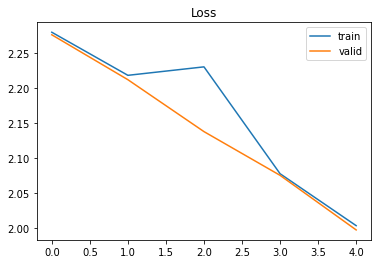

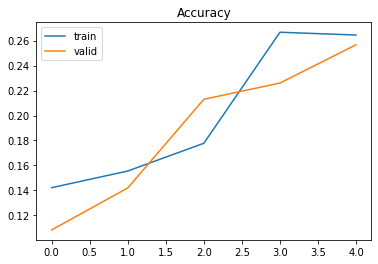

Evaluation on the validation dataset:
Metric Accuracy: 26%
Accuracy of plane (0): 30%
Accuracy of car   (1): 4%
Accuracy of bird  (2): 1%
Accuracy of cat   (3): 15%
Accuracy of deer  (4): 8%
Accuracy of dog   (5): 42%
Accuracy of frog  (6): 55%
Accuracy of horse (7): 4%
Accuracy of ship  (8): 47%
Accuracy of truck (9): 46%


In [69]:
# training on selected data
model = training_on_dataset(imgs= select_imgs,
                         labels= select_labels,
                         eval_imgs= valid_imgs,
                         eval_labels= valid_labels,
                         epochs= 5,
                         batch_size= 32,
                         metrics= {'Accuracy': accuracy},
                         verbose= True)

# evaluate the trained model on the validation dataset
_ = evaluate_classes(net= model,
                     imgs= valid_imgs,
                     labels= valid_labels,
                     batch_size= 32,
                     metrics= {'Accuracy': accuracy})


... # To complete.


### Exercise

In the previous exercise, we restricted the number of epochs to `5`. In this section, we ask you to train your model using a higher number of epochs (e.g., `50`, `100`). For a fair comparison, you should keep the following arguments:
- **batch_size**: `32`.
- **metrics**: `{'Accuracy': accuracy}`.
- **eval_imgs**: `valid_imgs`.
- **eval_labels**: `eval_labels`.

What do you observe?


[Epoch 1/100] Training loss: 2.279 | Validation loss: 2.276
[Epoch 2/100] Training loss: 2.218 | Validation loss: 2.212
[Epoch 3/100] Training loss: 2.230 | Validation loss: 2.138
[Epoch 4/100] Training loss: 2.078 | Validation loss: 2.075
[Epoch 5/100] Training loss: 2.003 | Validation loss: 1.997
[Epoch 6/100] Training loss: 1.976 | Validation loss: 1.992
[Epoch 7/100] Training loss: 1.917 | Validation loss: 1.991
[Epoch 8/100] Training loss: 1.835 | Validation loss: 1.966
[Epoch 9/100] Training loss: 1.758 | Validation loss: 1.974
[Epoch 10/100] Training loss: 1.735 | Validation loss: 1.974
[Epoch 11/100] Training loss: 1.684 | Validation loss: 1.946
[Epoch 12/100] Training loss: 1.635 | Validation loss: 2.018
[Epoch 13/100] Training loss: 1.670 | Validation loss: 1.911
[Epoch 14/100] Training loss: 1.534 | Validation loss: 1.957
[Epoch 15/100] Training loss: 1.470 | Validation loss: 1.954
[Epoch 16/100] Training loss: 1.517 | Validation loss: 2.018
[Epoch 17/100] Training loss: 1.2

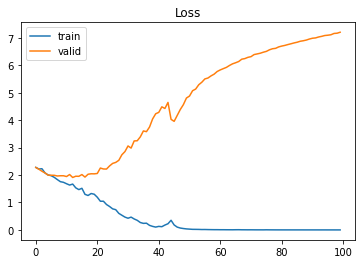

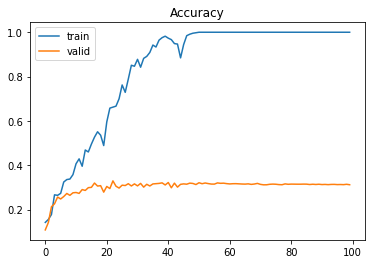

Evaluation on the validation dataset:
Metric Accuracy: 31%
Accuracy of plane (0): 33%
Accuracy of car   (1): 31%
Accuracy of bird  (2): 20%
Accuracy of cat   (3): 27%
Accuracy of deer  (4): 33%
Accuracy of dog   (5): 29%
Accuracy of frog  (6): 28%
Accuracy of horse (7): 24%
Accuracy of ship  (8): 53%
Accuracy of truck (9): 31%


In [70]:
# training on selected data
model = training_on_dataset(imgs= select_imgs,
                         labels= select_labels,
                         eval_imgs= valid_imgs,
                         eval_labels= valid_labels,
                         epochs= 100,
                         batch_size= 32,
                         metrics= {'Accuracy': accuracy},
                         verbose= True)

# evaluate the trained model on the validation dataset
_ = evaluate_classes(net= model,
                     imgs= valid_imgs,
                     labels= valid_labels,
                     batch_size= 32,
                     metrics= {'Accuracy': accuracy})


... # To complete.


## Performance as a function of the dataset size

Now, we train the same model on various ratios of the training dataset (e.g., 10% of the total training dataset) while keeping the validation dataset fixed. We want to observe the impact of using a larger training dataset.

The following function performs this study given a list of ratio values. It takes as arguments:
- **ratio_list**: list of ratio numbers to be considered in the study.
- **epochs** (optional): number of training epochs. Default: `5`.
- **seed** (optional): seed of the random generator: Default: `1234`.

This function generates a plot showing the performance (in terms of accuracy) as a function of the ratio of data used for training the model.

It is important to note that by fixing the number of epochs, as the size of the training set increases we perform more parameter updates. Hence, the overall study is not completely fair since we do not train on a fixed number of iterations. However, our goal here is to evaluate the relationship between the performance of a model and the number of examples in the training set.

In [0]:
def performance_study(ratio_list, epochs=5, seed=1234, verbose_eval=False):
  """
  Args:
     ratio_list: list of ratio numbers to be considered.
     epochs (optional): number of training epochs. Default: 5.
     seed (optional): seed of the numpy random generator: Default: 1234.
        
  Return:
     This method does not return anything, but it generates a plot.
      
  """
  results = []
  for ratio in ratio_list:
    select_imgs, select_labels = select_subset_from_dataset(
        train_imgs, train_labels, ratio
    )
    trained_model = training_on_dataset(
        select_imgs, select_labels, valid_imgs, valid_labels,
        epochs=epochs, batch_size=32,
        seed=seed, verbose=False
    )
    acc, _ = evaluate_classes(
        trained_model, valid_imgs, valid_labels, batch_size=32,
        verbose=verbose_eval
    )
    results.append(acc)
  
  print('Best accuracy: {:.0%}'.format(max(results)))
  plt.plot(ratio_list, results)
  plt.title('Model performance on validation set')
  plt.xlabel('Training set ratio')
  plt.ylabel('Accuracy')
  plt.show()


### Exercise

Evaluate the performance using the following ratios: `0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0`. 

You can choose the number of epochs you wish for this study. Just have in mind that the higher the number, the longer the time required for the training/study. Therefore, it is recommended to not exceed `epochs=20` for the purpose of this tutorial. As default, it is set to `epochs=5`.

Again, by having a fixed number of epochs, the bigger the training set the more often we update the model parameters.

What do you conclude?

Best accuracy: 61%


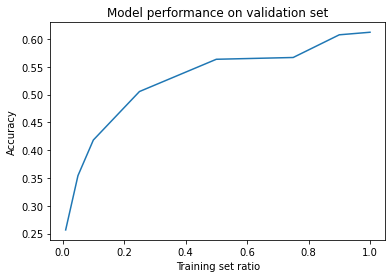

In [73]:
ratio_list = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
performance_study(ratio_list= ratio_list, epochs= 5)


Best accuracy: 63%


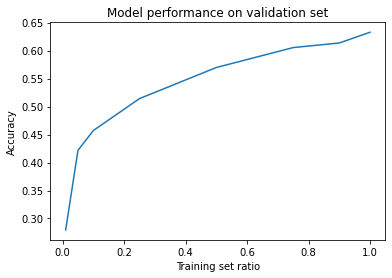

In [74]:
ratio_list = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
performance_study(ratio_list= ratio_list, epochs= 20)

... # To complete.


The parameters of neural networks are initialized at random values. If we don't fix a model seed, the generated random numbers used to initalize these parameters will be different. Try to run the same experiment with a different seed (e.g, `seed=8761`) using the same number of epochs as in the previous exercise. Do you obtain the same result?

Best accuracy: 61%


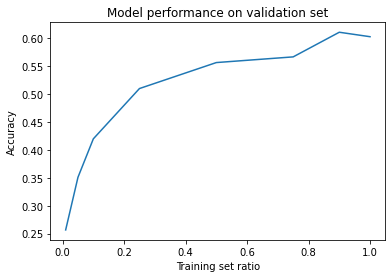

Best accuracy: 64%


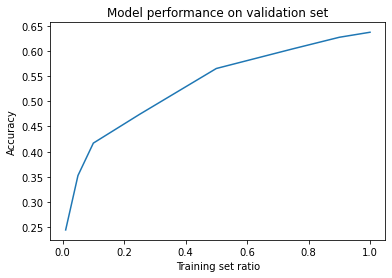

In [80]:
ratio_list = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
performance_study(ratio_list= ratio_list, epochs= 5, verbose_eval=False)
performance_study(ratio_list= ratio_list, epochs= 5, verbose_eval=False, seed=1991)

## Data augmentation

Very often, we are provided with a dataset and there are no means to collect more. In this section, we quickly explore the technique of data augmentation, which consists of altering the images in the training dataset without changing the associated labels. By doing so, it is possible to artificially augment the number of images in our training dataset. For example, we can think of the flipping or the cropping/resizing operations for altering an image in the dataset without modifying its associated label. As a result, by learning on an higher number of images we may observe some performance gains and/or better model generalization. However, since data augmentation is creating artificially new examples from existing ones, the independence assumption is not respected. Thus, we should not use data augmentation for the validation and the test sets.

### Exercise

Assume that we only have access to 30% of the original training dataset. Train a model with this portion of data and evaluate it on the validation dataset. As the number of examples increases in the training set, we may consider increasing the number of epochs while keeping in mind the overfitting problem. For this exercise, we will use the following arguments:
- **epochs**: `15`.
- **batch_size**: `32`.
- **metrics**: `{'Accuracy': accuracy}`.

[Epoch 1/15] Training loss: 1.886 | Validation loss: 1.678
[Epoch 2/15] Training loss: 1.590 | Validation loss: 1.502
[Epoch 3/15] Training loss: 1.457 | Validation loss: 1.456
[Epoch 4/15] Training loss: 1.367 | Validation loss: 1.377
[Epoch 5/15] Training loss: 1.291 | Validation loss: 1.347
[Epoch 6/15] Training loss: 1.231 | Validation loss: 1.338
[Epoch 7/15] Training loss: 1.158 | Validation loss: 1.306
[Epoch 8/15] Training loss: 1.092 | Validation loss: 1.291
[Epoch 9/15] Training loss: 1.029 | Validation loss: 1.315
[Epoch 10/15] Training loss: 0.973 | Validation loss: 1.368
[Epoch 11/15] Training loss: 0.923 | Validation loss: 1.348
[Epoch 12/15] Training loss: 0.861 | Validation loss: 1.365
[Epoch 13/15] Training loss: 0.811 | Validation loss: 1.388
[Epoch 14/15] Training loss: 0.750 | Validation loss: 1.458
[Epoch 15/15] Training loss: 0.705 | Validation loss: 1.585


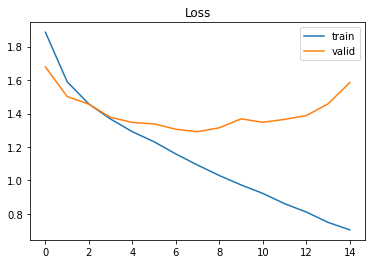

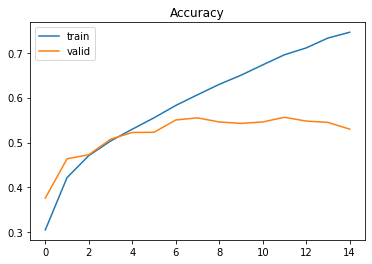

Evaluation on the validation dataset:
Metric Accuracy: 53%
Accuracy of plane (0): 65%
Accuracy of car   (1): 68%
Accuracy of bird  (2): 41%
Accuracy of cat   (3): 38%
Accuracy of deer  (4): 48%
Accuracy of dog   (5): 45%
Accuracy of frog  (6): 65%
Accuracy of horse (7): 49%
Accuracy of ship  (8): 48%
Accuracy of truck (9): 64%
Evaluation on the validation dataset:
Metric Accuracy: 52%
Accuracy of plane (0): 67%
Accuracy of car   (1): 65%
Accuracy of bird  (2): 38%
Accuracy of cat   (3): 36%
Accuracy of deer  (4): 44%
Accuracy of dog   (5): 46%
Accuracy of frog  (6): 66%
Accuracy of horse (7): 50%
Accuracy of ship  (8): 46%
Accuracy of truck (9): 67%


In [83]:
# select the data
select_imgs, select_labels = select_subset_from_dataset(train_imgs,
                                                        train_labels,
                                                        0.3)

model50 = training_on_dataset(imgs= select_imgs,
                              labels= select_labels,
                              eval_imgs= valid_imgs,
                              eval_labels= valid_labels,
                              epochs= 15,
                              batch_size= 32,
                              metrics= {'Accuracy': accuracy},
                              verbose= True)

# evaluate the trained model on the validation dataset
_ = evaluate_classes(net= model50,
                     imgs= valid_imgs,
                     labels= valid_labels,
                     batch_size= 32,
                     metrics= {'Accuracy': accuracy})

_ = evaluate_classes(net= model50,
                     imgs= test_imgs,
                     labels= test_labels,
                     batch_size= 32,
                     metrics= {'Accuracy': accuracy})

In [84]:
print(_)

(0.5246, [0.67, 0.648, 0.383, 0.365, 0.442, 0.455, 0.656, 0.502, 0.455, 0.67])


### Exercise

The following code defines a transformation, using the PyTorch framework. With the random resized crop operation, a crop of random size (0.7 to 1.0) of the original image is made and finally resized to a 32 x 32 image. The `transforms` operations are applied to the original images at every mini-batch generation. This leaves the images of your dataset unchanged, only the mini-batch images are copied and transformed every iteration.

In [0]:
import torchvision.transforms as transforms


transformations = transforms.Compose([
    transforms.Normalize((-1., -1., -1.), (2., 2., 2.)),
    transforms.ToPILImage(),
    transforms.RandomResizedCrop((32, 32), scale=(0.7, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

This time, train a new model using the same architecture by applying data augmentation on the extracted 30% of the training dataset. Evaluate your model and compare your results with those from the previous exercise. Use the following arguments:
- **epochs**: `15`.
- **batch_size**: `32`.
- **metrics**: `{'Accuracy': accuracy}`.

Note that you can use the argument `transformations` of the `training_on_dataset` method to perform data augmentation during training.

What do you observe?

[Epoch 1/15] Training loss: 1.945 | Validation loss: 1.781
[Epoch 2/15] Training loss: 1.700 | Validation loss: 1.560
[Epoch 3/15] Training loss: 1.584 | Validation loss: 1.514
[Epoch 4/15] Training loss: 1.515 | Validation loss: 1.440
[Epoch 5/15] Training loss: 1.462 | Validation loss: 1.422
[Epoch 6/15] Training loss: 1.425 | Validation loss: 1.385
[Epoch 7/15] Training loss: 1.389 | Validation loss: 1.363
[Epoch 8/15] Training loss: 1.343 | Validation loss: 1.328
[Epoch 9/15] Training loss: 1.313 | Validation loss: 1.321
[Epoch 10/15] Training loss: 1.290 | Validation loss: 1.315
[Epoch 11/15] Training loss: 1.270 | Validation loss: 1.294
[Epoch 12/15] Training loss: 1.239 | Validation loss: 1.285
[Epoch 13/15] Training loss: 1.226 | Validation loss: 1.263
[Epoch 14/15] Training loss: 1.200 | Validation loss: 1.280
[Epoch 15/15] Training loss: 1.179 | Validation loss: 1.278


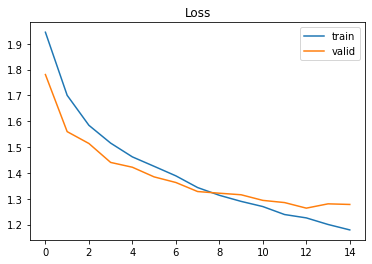

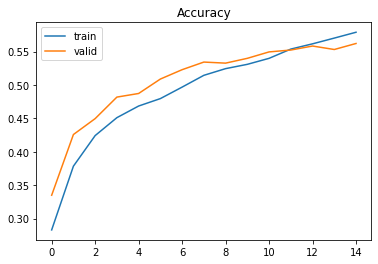

Evaluation on the validation dataset:
Metric Accuracy: 53%
Accuracy of plane (0): 65%
Accuracy of car   (1): 68%
Accuracy of bird  (2): 41%
Accuracy of cat   (3): 38%
Accuracy of deer  (4): 48%
Accuracy of dog   (5): 45%
Accuracy of frog  (6): 65%
Accuracy of horse (7): 49%
Accuracy of ship  (8): 48%
Accuracy of truck (9): 64%


In [86]:
model50A = training_on_dataset(imgs= select_imgs,
                              labels= select_labels,
                              eval_imgs= valid_imgs,
                              eval_labels= valid_labels,
                              epochs= 15,
                              batch_size= 32,
                              transformations= transformations,
                              metrics= {'Accuracy': accuracy},
                              verbose= True)

# evaluate the trained model on the validation dataset
_ = evaluate_classes(net= model50,
                     imgs= valid_imgs,
                     labels= valid_labels,
                     batch_size= 32,
                     metrics= {'Accuracy': accuracy})


... # To complete.


# Unbalanced datasets

## What is an unbalanced dataset?

Up to now, the training dataset contained about the same number of images for each label. In this section, we explore the impact of training models on an unbalanced dataset, which happens when each class does not make up an equal portion of your dataset. 

The following function selects a portion of data from a given dataset while providing a defined label distribution. It takes as input six arguments:
- **imgs**: numpy array representing the image set from which the selection is made.
- **labels**: labels associated with the provided image set.
- **label_dist**: the distribution of labels to be selected, represented by a dict of `{label: value}`.
- **ratio** (optional): portion of the data that will be selected. Default: `0.1`.
- **shuffle** (optional): whether or not the data need to be shuffled before the selection is made. Default: `True`.
- **seed** (optional): seed of the random generator: Default: `1234`.

It provides as output 2 elements:
- **select_imgs**: a numpy array of the selected images.
- **select_labels**: labels associated with the selected images.


In [0]:
def select_subset_from_dataset_with_label_dist(
    imgs, labels, label_dist, ratio=0.1, shuffle=True, seed=1234):
  """
  Args:
     imgs: numpy array representing the image set from which 
        the selection is made.
     labels: the labels associated with the provided images.
     label_dist: the distribution of labels to select.
     ratio (optional): portion of the data to be selected. Default: 0.1.
     shuffle (optional): Whether or not to shuffle the data. Default: True.
     seed (optional): seed of the numpy random generator: Default: 1234.
        
  Return:
     A tuple of 2 elements (select_imgs, select_labels)
     where:
        select_imgs: a numpy array of the selected images.
        select_labels: labels associated with the selected images.
      
  """
  if isinstance(label_dist, (list, tuple)):
    label_dist = {a:v for a,v in enumerate(label_dist)}
  sum_dist = sum(label_dist.values())
  for lab in label_dist.keys():
    label_dist[lab] /= sum_dist
    
  tgts = np.array(labels)
  num_indices = int(ratio*len(labels))
  num_idx_lab = {a: int(label_dist[a]*num_indices) for a in label_dist.keys()}
  
  sel_ind = []
  
  if shuffle:
    np.random.seed(seed)  # Set the random seed of numpy.

  for a in num_idx_lab.keys():
    idx = np.where(tgts==a)
    idx = idx[0]
    if shuffle:
      idx = np.random.permutation(idx)
    num = min(num_idx_lab[a], len(idx))
    idx = idx[0:num]
    sel_ind.extend(idx)
    
  if shuffle:
    sel_ind = np.random.permutation(sel_ind)
  else:
    sel_ind.sort()
    sel_ind = np.array(sel_ind)
    
  select_imgs = imgs[sel_ind, :]
  select_labels = tgts[sel_ind].tolist()
  
  return select_imgs, select_labels


### Exercise

Using the function defined above with its default parameters, extract 30% of the data from the original training dataset while providing the following label distribution:
- **0**: `0.4`.
- **1**: `0.1`.
- **2**: `0.05`.
- **3**: `0.01`.
- **4**: `0.2`.
- **5**: `0.14`.
- **6**: `0.02`.
- **7**: `0.005`.
- **8**: `0.045`.
- **9**: `0.03`.

In addition, compute the histogram of the resulting dataset.

Note that we will first train our model on an unbalanced training dataset, but evaluate it on the balanced validation set that we’ve been using since the beginning of this tutorial. We’ll then build a validation set with a distribution that matches that of the training set.


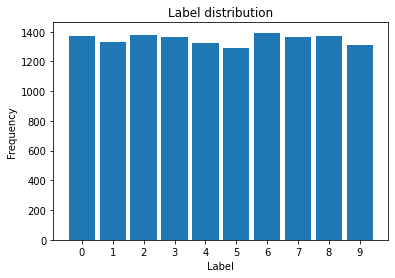

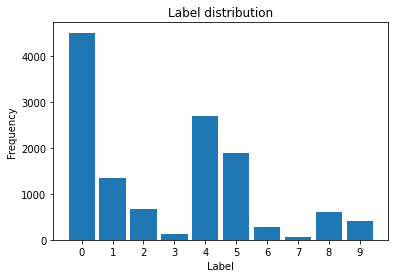

In [95]:
label_distribution = {
    0: 0.4,
    1: 0.1,
    2: 0.05,
    3: 0.01,
    4: 0.2, 
    5: 0.14,
    6: 0.02,
    7: 0.005,
    8: 0.045,
    9: 0.03
}

# select data according to a provided distribution

select_imgs, select_labels = select_subset_from_dataset(train_imgs,
                                                        train_labels,
                                                        ratio=0.3,
                                                        shuffle=False)

plot_dataset_histogram(select_labels, title='Label distribution')

select_imgs, select_labels = select_subset_from_dataset_with_label_dist(
    train_imgs, train_labels, label_distribution, ratio=0.3, shuffle=False)

# plot the histogram of the selected labels
plot_dataset_histogram(select_labels, title='Label distribution')



## Is accuracy a good metric for an unbalanced dataset?

### Exercise

Train a model using your new extracted training dataset and evaluate its performance on the validation dataset. Use the following arguments:
- **epochs**: `15`.
- **batch_size**: `32`.
- **metrics**: `{'Accuracy': accuracy}`.

What do you observe in terms of differences between the train accuracy and the valid accuracy? What do you observe regarding the accuracies of less frequent labels?


[Epoch 1/15] Training loss: 1.459 | Validation loss: 2.480
[Epoch 2/15] Training loss: 1.177 | Validation loss: 2.491
[Epoch 3/15] Training loss: 1.064 | Validation loss: 2.070
[Epoch 4/15] Training loss: 1.004 | Validation loss: 1.965
[Epoch 5/15] Training loss: 0.938 | Validation loss: 2.157
[Epoch 6/15] Training loss: 0.887 | Validation loss: 1.967
[Epoch 7/15] Training loss: 0.838 | Validation loss: 1.953
[Epoch 8/15] Training loss: 0.799 | Validation loss: 1.900
[Epoch 9/15] Training loss: 0.749 | Validation loss: 1.885
[Epoch 10/15] Training loss: 0.710 | Validation loss: 1.989
[Epoch 11/15] Training loss: 0.670 | Validation loss: 2.042
[Epoch 12/15] Training loss: 0.624 | Validation loss: 2.075
[Epoch 13/15] Training loss: 0.584 | Validation loss: 2.217
[Epoch 14/15] Training loss: 0.545 | Validation loss: 2.171
[Epoch 15/15] Training loss: 0.506 | Validation loss: 2.072


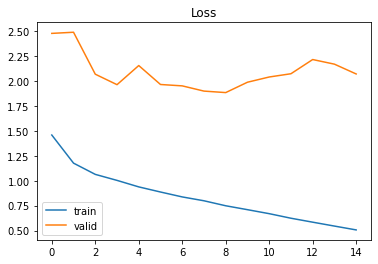

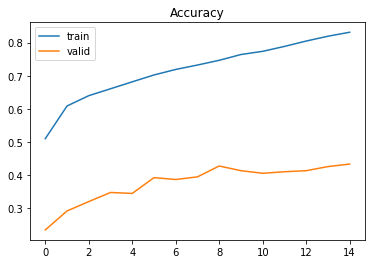

Evaluation on the validation dataset:
Metric Accuracy: 43%
Accuracy of plane (0): 81%
Accuracy of car   (1): 78%
Accuracy of bird  (2): 20%
Accuracy of cat   (3): 0%
Accuracy of deer  (4): 69%
Accuracy of dog   (5): 81%
Accuracy of frog  (6): 23%
Accuracy of horse (7): 8%
Accuracy of ship  (8): 48%
Accuracy of truck (9): 26%


In [96]:
modelUnbal = training_on_dataset(imgs= select_imgs,
                              labels= select_labels,
                              eval_imgs= valid_imgs,
                              eval_labels= valid_labels,
                              epochs= 15,
                              batch_size= 32,
                              metrics= {'Accuracy': accuracy},
                              verbose= True)

# evaluate the trained model on the validation dataset
_ = evaluate_classes(net= modelUnbal,
                     imgs= valid_imgs,
                     labels= valid_labels,
                     batch_size= 32,
                     metrics= {'Accuracy': accuracy})

... # To complete.


### Exercise

When we have an unbalanced dataset, the F1 score is usually a recommended performance metric as it can be interpreted as a weighted average of the [Precision and Recall scores](https://en.wikipedia.org/wiki/Precision_and_recall).

Train a model using the extracted training dataset and evaluate its performance on the validation dataset. Use the same arguments as in the last exercise, but add the F1 score:
- **epochs**: `15`.
- **batch_size**: `32`.
- **metrics**: `{'Accuracy': accuracy, 'F1': f1_score}`.

What differences do you observe in terms of performance metrics between the training and validation datasets?


[Epoch 1/15] Training loss: 1.460 | Validation loss: 2.464
[Epoch 2/15] Training loss: 1.176 | Validation loss: 2.494
[Epoch 3/15] Training loss: 1.060 | Validation loss: 2.021
[Epoch 4/15] Training loss: 0.998 | Validation loss: 1.961
[Epoch 5/15] Training loss: 0.933 | Validation loss: 2.135
[Epoch 6/15] Training loss: 0.882 | Validation loss: 1.933
[Epoch 7/15] Training loss: 0.835 | Validation loss: 1.951
[Epoch 8/15] Training loss: 0.797 | Validation loss: 1.901
[Epoch 9/15] Training loss: 0.745 | Validation loss: 1.894
[Epoch 10/15] Training loss: 0.702 | Validation loss: 2.047
[Epoch 11/15] Training loss: 0.663 | Validation loss: 2.024
[Epoch 12/15] Training loss: 0.617 | Validation loss: 2.023
[Epoch 13/15] Training loss: 0.581 | Validation loss: 2.214
[Epoch 14/15] Training loss: 0.532 | Validation loss: 2.260
[Epoch 15/15] Training loss: 0.492 | Validation loss: 2.049


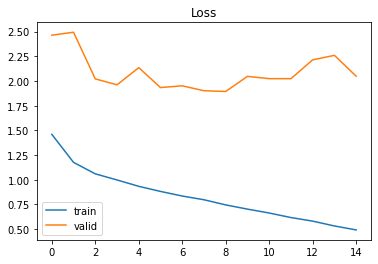

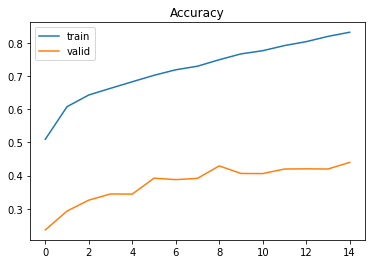

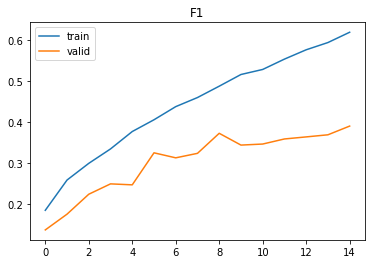

Evaluation on the validation dataset:
Metric Accuracy: 44%
Metric F1: 39%
Accuracy of plane (0): 81%
Accuracy of car   (1): 75%
Accuracy of bird  (2): 21%
Accuracy of cat   (3): 0%
Accuracy of deer  (4): 78%
Accuracy of dog   (5): 72%
Accuracy of frog  (6): 30%
Accuracy of horse (7): 6%
Accuracy of ship  (8): 49%
Accuracy of truck (9): 29%


In [98]:
modelUnbal = training_on_dataset(imgs= select_imgs,
                              labels= select_labels,
                              eval_imgs= valid_imgs,
                              eval_labels= valid_labels,
                              epochs= 15,
                              batch_size= 32,
                              metrics= {'Accuracy': accuracy, 'F1': f1_score},
                              verbose= True)

# evaluate the trained model on the validation dataset
_ = evaluate_classes(net= modelUnbal,
                     imgs= valid_imgs,
                     labels= valid_labels,
                     batch_size= 32,
                     metrics= {'Accuracy': accuracy, 'F1': f1_score})

... # To complete.


### Exercise

Now imagine that the validation set is as unbalanced as the training set. Is the observation made previously still valid?

To answer this question, extract 30% of the original validation dataset with the above label distribution and use it as the new validation set for this exercise.

[Epoch 1/15] Training loss: 1.460 | Validation loss: 1.212
[Epoch 2/15] Training loss: 1.176 | Validation loss: 1.101
[Epoch 3/15] Training loss: 1.063 | Validation loss: 1.026
[Epoch 4/15] Training loss: 1.002 | Validation loss: 1.026
[Epoch 5/15] Training loss: 0.936 | Validation loss: 1.003
[Epoch 6/15] Training loss: 0.886 | Validation loss: 0.933
[Epoch 7/15] Training loss: 0.838 | Validation loss: 0.939
[Epoch 8/15] Training loss: 0.795 | Validation loss: 0.925
[Epoch 9/15] Training loss: 0.748 | Validation loss: 0.894
[Epoch 10/15] Training loss: 0.708 | Validation loss: 0.905
[Epoch 11/15] Training loss: 0.668 | Validation loss: 0.931
[Epoch 12/15] Training loss: 0.622 | Validation loss: 0.986
[Epoch 13/15] Training loss: 0.587 | Validation loss: 0.975
[Epoch 14/15] Training loss: 0.536 | Validation loss: 1.038
[Epoch 15/15] Training loss: 0.492 | Validation loss: 1.019


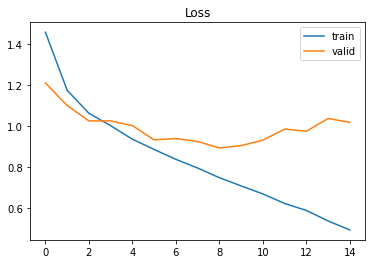

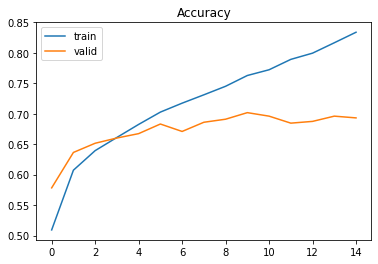

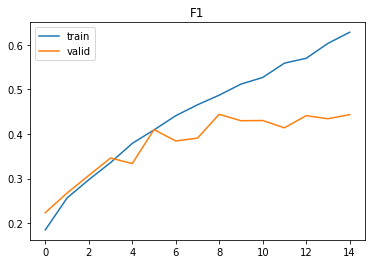

Evaluation on the validation dataset:
Metric Accuracy: 69%
Metric F1: 44%
Accuracy of plane (0): 79%
Accuracy of car   (1): 81%
Accuracy of bird  (2): 28%
Accuracy of cat   (3): 0%
Accuracy of deer  (4): 73%
Accuracy of dog   (5): 77%
Accuracy of frog  (6): 23%
Accuracy of horse (7): 0%
Accuracy of ship  (8): 45%
Accuracy of truck (9): 31%


In [99]:
# select 30% of the validation dataset with the provided label distribution
unb_valid_imgs, unb_valid_labels = select_subset_from_dataset_with_label_dist(
    valid_imgs, valid_labels, label_distribution, ratio=0.3, shuffle=False)


# training on using the unbalanced training and validation sets
modelUnbal = training_on_dataset(imgs= select_imgs,
                              labels= select_labels,
                              eval_imgs= unb_valid_imgs,
                              eval_labels= unb_valid_labels,
                              epochs= 15,
                              batch_size= 32,
                              metrics= {'Accuracy': accuracy, 'F1': f1_score},
                              verbose= True)

# evaluate the trained model on the validation dataset
_ = evaluate_classes(net= modelUnbal,
                     imgs= unb_valid_imgs,
                     labels= unb_valid_labels,
                     batch_size= 32,
                     metrics= {'Accuracy': accuracy, 'F1': f1_score})


... # To complete.


## Dealing with unbalanced datasets

One way to mitigate the effect of an unbalanced dataset during the training process is to penalize the model when it makes classification errors on less frequent classes. A way to achieve this is to assign importance weights to labels that are inversely proportional to their density within the dataset.

### Exercise

Compute the importance weights of each label using the label distribution provided at the previous section.


In [113]:
label_distribution

{0: 0.4,
 1: 0.1,
 2: 0.05,
 3: 0.01,
 4: 0.2,
 5: 0.14,
 6: 0.02,
 7: 0.005,
 8: 0.045,
 9: 0.03}

In [116]:
label_weights = [1-label_distribution[_] for _ in label_distribution]

for i, w in enumerate(label_weights):
  print('Importance weight for {:<5s} ({}): {:.3f}'.format(classe_names[i], i, w))

Importance weight for plane (0): 0.600
Importance weight for car   (1): 0.900
Importance weight for bird  (2): 0.950
Importance weight for cat   (3): 0.990
Importance weight for deer  (4): 0.800
Importance weight for dog   (5): 0.860
Importance weight for frog  (6): 0.980
Importance weight for horse (7): 0.995
Importance weight for ship  (8): 0.955
Importance weight for truck (9): 0.970


### Exercise

Using the importance weights computed above, train a model using the extracted training dataset and evaluate its performance on the original validation dataset. For the sake of fair comparisons, use the same arguments as in the previous exercise:
- **epochs**: `15`.
- **batch_size**: `32`.
- **metrics**: `{'Accuracy': accuracy, 'F1': f1_score}`.

Note that the importance weights could be passed to the training method using the argument `label_weights`.

What do you observe?


[Epoch 1/15] Training loss: 1.559 | Validation loss: 2.409
[Epoch 2/15] Training loss: 1.262 | Validation loss: 2.457
[Epoch 3/15] Training loss: 1.146 | Validation loss: 2.063
[Epoch 4/15] Training loss: 1.082 | Validation loss: 1.970
[Epoch 5/15] Training loss: 1.010 | Validation loss: 2.178
[Epoch 6/15] Training loss: 0.953 | Validation loss: 1.992
[Epoch 7/15] Training loss: 0.898 | Validation loss: 1.974
[Epoch 8/15] Training loss: 0.851 | Validation loss: 1.895
[Epoch 9/15] Training loss: 0.794 | Validation loss: 1.945
[Epoch 10/15] Training loss: 0.743 | Validation loss: 2.067
[Epoch 11/15] Training loss: 0.696 | Validation loss: 1.981
[Epoch 12/15] Training loss: 0.641 | Validation loss: 1.983
[Epoch 13/15] Training loss: 0.593 | Validation loss: 2.251
[Epoch 14/15] Training loss: 0.545 | Validation loss: 2.388
[Epoch 15/15] Training loss: 0.495 | Validation loss: 2.199


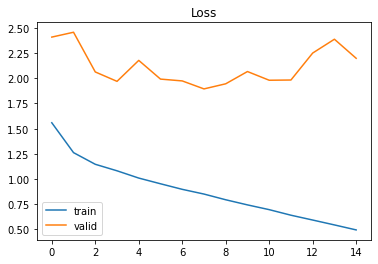

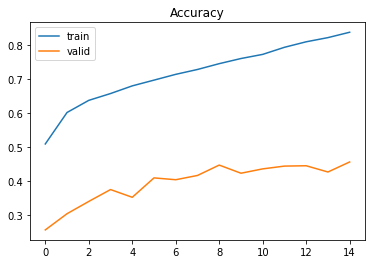

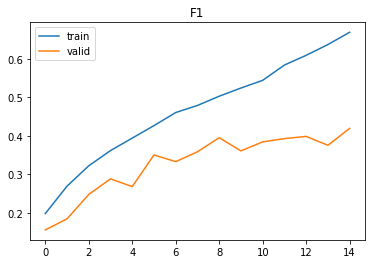

Evaluation on the validation dataset:
Metric Accuracy: 46%
Metric F1: 42%
Accuracy of plane (0): 78%
Accuracy of car   (1): 74%
Accuracy of bird  (2): 31%
Accuracy of cat   (3): 2%
Accuracy of deer  (4): 69%
Accuracy of dog   (5): 73%
Accuracy of frog  (6): 31%
Accuracy of horse (7): 9%
Accuracy of ship  (8): 49%
Accuracy of truck (9): 40%


In [118]:
# training on selected data
modelUnbal2 = training_on_dataset(imgs= select_imgs,
                              labels= select_labels,
                              eval_imgs= valid_imgs,
                              eval_labels= valid_labels,
                              epochs= 15,
                              batch_size= 32,
                              label_weights= label_weights,
                              metrics= {'Accuracy': accuracy, 'F1': f1_score},
                              verbose= True)

# evaluate the trained model on the validation dataset
_ = evaluate_classes(net= modelUnbal2,
                     imgs= valid_imgs,
                     labels= valid_labels,
                     batch_size= 32,
                     metrics= {'Accuracy': accuracy, 'F1': f1_score})

... # To complete.


# Reproducibility

We have seen that there is place for a lot of randomness in machine learning experiments, specifically when:
- splitting an original dataset into training/validation/test sets.
- initializing the parameters of a model.
- splitting a training set into batches to train a model.

Therefore, we normally get different results each time we run the same experiment. To allow reproducibility of your results, it is required to fix the **random seed** before creating each dataset and model. Hence, to be reproducible it is best practice to manually set:

1. Python pseudorandom number generator at a fixed value:
```
import random
random.seed(seed_value)
```

2. NumPy pseudorandom number generator at a fixed value:
```
import numpy as np
np.random.seed(seed_value)
```

3. PyTorch pseudorandom number generator at a fixed value for all devices (both CPU and GPU):
```
import torch
torch.manual_seed(seed_value)
```

4. PyTorch pseudorandom number generator at a fixed value for the GPU(s):
```
import torch
torch.cuda.manual_seed(seed_value)  # Current GPU.
torch.cuda.manual_seed_all(seed_value)  # All GPUs.
```

5. CuDNN algorithms (an extension of CUDA for deep learning) to be deterministic in PyTorch:
```
import torch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
```

Note that deterministic algorithms can make computations dramatically slower. While manually fixing random seeds helps reproducibility, completely reproducible results are not guaranteed across PyTorch releases and different platforms, devices or drivers.

Furthermore, more randomness comes in when doing hyperparameter tuning or using multiple GPU devices in parallel, but that's beyond the scope of this tutorial.

Finally, a good practice, implemented in Scikit-Learn, is to create a local RandomState object instead of using the global RandomState object and to pass it to every module using randomness. However, the Pytorch API does not allow it, and for now, using global RNGs is recommended.